# Лабораторная работа №4
## Выделение контуров на изображениях

Для свертки использовать написанную ранее в ЛР2 функцию, по необходимость дописать её для работы с масками с четной размерностью.

1. Считать цветное rgb изображение. Преобразовать в градации серого.

2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами
3. Сделать выделение контуров методом по вариантам.  
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

4. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

# Варианты задания


№ варианта | Задание 2 | Задание 3 | Задание 4 
--- | :---: | :---:  | :---:
10 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3


Импорт необходимых библиотек

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import warnings
from IPython.display import clear_output

1. Считать цветное rgb изображение. Преобразовать в градации серого.

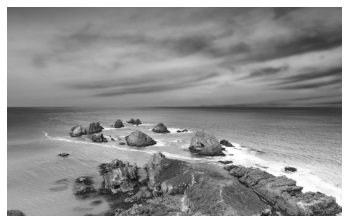

In [2]:
gray = cv2.cvtColor(cv2.imread("C:\\SOI.jpg"), cv2.COLOR_RGB2GRAY)
plt.axis("off")
plt.imshow(gray, cmap='gray')

2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

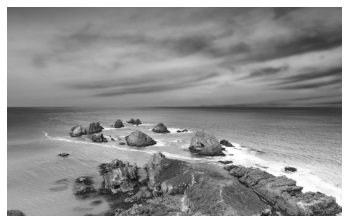

In [3]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

In [4]:
# Реализуем функцию свёртки
def convolution(input_image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    rows, cols = input_image.shape
    result = np.zeros((rows, cols))
    kernel_x, kernel_y = kernel.shape

    if kernel_x % 2 == 0:
        augmented_shape_rows = rows + (kernel_x // 2)
        copy_image_rows = (0, rows)
    else:
        augmented_shape_rows = rows + 2 * (kernel_x // 2)
        copy_image_rows = (kernel_x // 2, augmented_shape_rows - (kernel_x // 2))

    if kernel_y % 2 == 0:
        augmented_shape_cols = cols + (kernel_y // 2)
        copy_image_cols = (0, cols)
    else:
        augmented_shape_cols = cols + 2 * (kernel_y // 2)
        copy_image_cols = (kernel_y // 2, augmented_shape_cols - (kernel_y // 2))

    augmented_image = np.zeros((augmented_shape_rows, augmented_shape_cols))
    augmented_image[copy_image_rows[0] : copy_image_rows[1], copy_image_rows[0] : copy_image_cols[1]] = input_image
    
    for i in tqdm(range(rows)):
        for j in range(cols):
            result[i, j] = int((np.flipud(np.fliplr(kernel)) * augmented_image[i : i + kernel_x, j : j + kernel_y]).sum())
    clear_output()
    return result

In [5]:
grad_image = (np.abs(convolution(gray, np.array([[-1], [1]]))) + np.abs(convolution(gray, np.array([[-1, 1]])))).astype(np.int8)

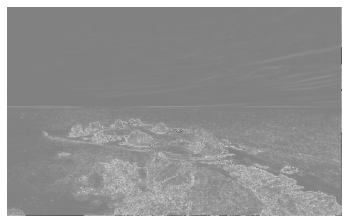

In [6]:
plt.axis("off")
plt.imshow(grad_image, cmap='gray')

In [7]:
def binary_image(input_image: np.ndarray, threshold: int = 40) -> np.ndarray:
    return np.vectorize(lambda x: 1 if x > threshold else 0)(input_image).astype(np.uint8)

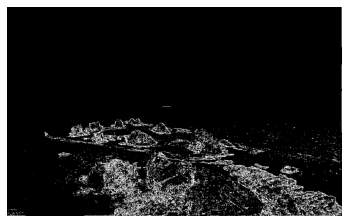

In [8]:
plt.axis("off")
plt.imshow(binary_image(grad_image), cmap='gray')

3. Сделать выделение контуров методом по вариантам.  
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

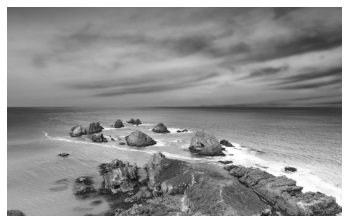

In [9]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

In [10]:
sobel_x = np.array([
    [-1,-2, -1],
    [ 0, 0,  0],
    [ 1, 2,  1],
])

sobel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

grad = np.sqrt(convolution(gray, sobel_x) ** 2 + convolution(gray, sobel_y) ** 2)

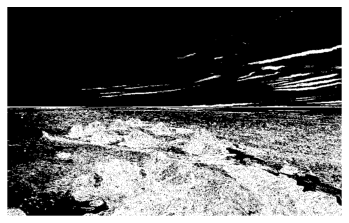

In [11]:
plt.axis("off")
plt.imshow(binary_image(grad), cmap='gray')

4. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

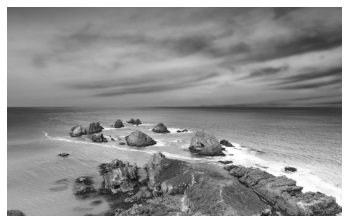

In [12]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

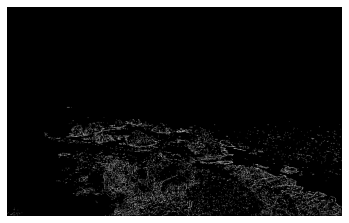

In [13]:
agreement_image = convolution(gray, 1 / 3 * np.array([[2,  -1,  2], [-1, -4, -1], [2,  -1,  2]]))
plt.axis("off")
plt.imshow(binary_image(agreement_image), cmap='gray')